In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/indian-sign-language-dataset/data/N/623.jpg
/kaggle/input/indian-sign-language-dataset/data/N/764.jpg
/kaggle/input/indian-sign-language-dataset/data/N/1075.jpg
/kaggle/input/indian-sign-language-dataset/data/N/771.jpg
/kaggle/input/indian-sign-language-dataset/data/N/208.jpg
/kaggle/input/indian-sign-language-dataset/data/N/820.jpg
/kaggle/input/indian-sign-language-dataset/data/N/473.jpg
/kaggle/input/indian-sign-language-dataset/data/N/1031.jpg
/kaggle/input/indian-sign-language-dataset/data/N/333.jpg
/kaggle/input/indian-sign-language-dataset/data/N/1024.jpg
/kaggle/input/indian-sign-language-dataset/data/N/537.jpg
/kaggle/input/indian-sign-language-dataset/data/N/45.jpg
/kaggle/input/indian-sign-language-dataset/data/N/369.jpg
/kaggle/input/indian-sign-language-dataset/data/N/56.jpg
/kaggle/input/indian-sign-language-dataset/data/N/654.jpg
/kaggle/input/indian-sign-language-dataset/data/N/89.jpg
/kaggle/input/indian-sign-language-dataset/data/N/20.jpg
/kaggle/input/i

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


ERROR: Could not find a version that satisfies the requirement splitfolders (from versions: none)
ERROR: No matching distribution found for splitfolders


In [19]:
!pip install split-folders
import splitfolders

input_folder = "/kaggle/input/indian-sign-language-dataset/data"
output_folder = "/kaggle/working/split"

splitfolders.ratio(input_folder, output_folder, seed=42, ratio=(0.8, 0.2,))


Copying files: 42000 files [02:03, 339.87 files/s] 


In [27]:
from keras.models import Sequential
from keras.layers import Activation,Dense,Dropout,Flatten,Conv2D,MaxPooling2D,BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
input_shape=(64,64,3)
img_width=64
img_height=64
batch_size=16

train_data_dir='/kaggle/working/split/train'
validation_data_dir='/kaggle/working/split/val'

validation_data_gen=ImageDataGenerator(
    rescale=1./255
)
train_data_gen=ImageDataGenerator(
rescale=1./255,
    rotation_range=0.3,
    width_shift_range=0.3,
    height_shift_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest'
    
)

train_generator=train_data_gen.flow_from_directory(
    train_data_dir,
    target_size=(img_width,img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)
validation_generator=train_data_gen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width,img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

Found 33600 images belonging to 35 classes.
Found 8400 images belonging to 35 classes.


In [29]:
from keras.models import Sequential
from keras.layers import Dense,Activation,MaxPooling2D,Flatten,Conv2D,Dropout
num_classes=35

model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(64,64,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(num_classes,activation='softmax'))
model.summary()


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_24 (MaxPooli  (None, 31, 31, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_25 (Conv2D)          (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_25 (MaxPooli  (None, 14, 14, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_26 (Conv2D)          (None, 12, 12, 64)        36928     
                                                                 
 max_pooling2d_26 (MaxPooli  (None, 6, 6, 64)         

In [30]:

from keras.optimizers import RMSprop,Adam
from keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau

checkpoint=ModelCheckpoint(
    'sign classifcation.h5',
    monitor="val_loss",
    mode="min",
    save_best_only=True,
    verbose=1,
)

earlystopping=EarlyStopping(
    monitor='val_loss',
    min_delta=0.001,
    patience=3,
    restore_best_weights=True
)

reduce_lr=ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.01,
    patience=3,
    min_delta=0.001,
    
)

callbacks=[earlystopping,checkpoint,reduce_lr]

model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.0001),
              metrics=['accuracy'])
num_train_samples=33600
num_valid_samples=8400
epochs=10

history=model.fit_generator(
    train_generator,
    steps_per_epoch=num_train_samples // batch_size,
    callbacks=callbacks,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=num_valid_samples//batch_size)


Epoch 1/10


/tmp/ipykernel_26/3283385059.py:35: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(


2099/2100 [============================>.] - ETA: 0s - loss: 0.6411 - accuracy: 0.8003
Epoch 1: val_loss improved from inf to 0.10787, saving model to sign classifcation.h5
2100/2100 [==============================] - 88s 40ms/step - loss: 0.6408 - accuracy: 0.8004 - val_loss: 0.1079 - val_accuracy: 0.9642 - lr: 0.0010
Epoch 2/10
   3/2100 [..............................] - ETA: 1:04 - loss: 0.1390 - accuracy: 0.9792

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2099/2100 [============================>.] - ETA: 0s - loss: 0.0600 - accuracy: 0.9807
Epoch 2: val_loss improved from 0.10787 to 0.03751, saving model to sign classifcation.h5
2100/2100 [==============================] - 83s 39ms/step - loss: 0.0599 - accuracy: 0.9807 - val_loss: 0.0375 - val_accuracy: 0.9873 - lr: 0.0010
Epoch 3/10
2100/2100 [==============================] - ETA: 0s - loss: 0.0351 - accuracy: 0.9887
Epoch 3: val_loss improved from 0.03751 to 0.00410, saving model to sign classifcation.h5
2100/2100 [==============================] - 83s 39ms/step - loss: 0.0351 - accuracy: 0.9887 - val_loss: 0.0041 - val_accuracy: 0.9986 - lr: 0.0010
Epoch 4/10
2100/2100 [==============================] - ETA: 0s - loss: 0.0258 - accuracy: 0.9922
Epoch 4: val_loss did not improve from 0.00410
2100/2100 [==============================] - 83s 40ms/step - loss: 0.0258 - accuracy: 0.9922 - val_loss: 0.0558 - val_accuracy: 0.9832 - lr: 0.0010
Epoch 5/10
2100/2100 [========================

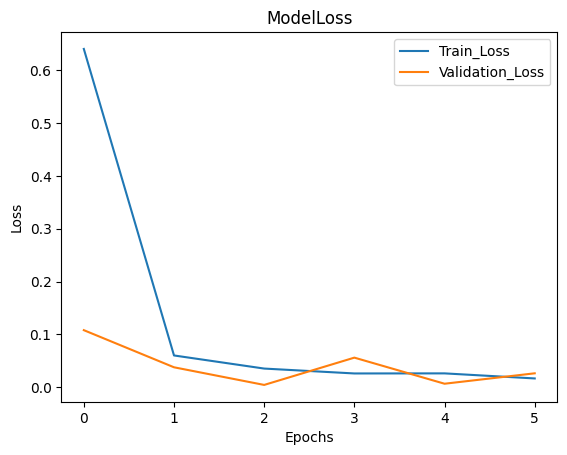

In [31]:
# plotting Training and validation loss
import matplotlib.pyplot as plt


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('ModelLoss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(['Train_Loss','Validation_Loss'],loc='upper right')
plt.show()

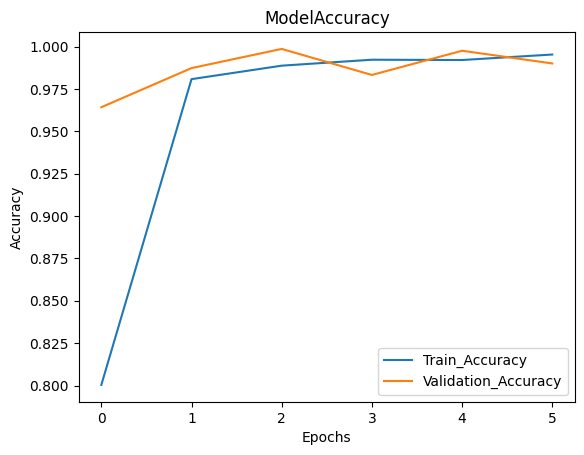

In [33]:
# plotting Training and validation accuracy
import matplotlib.pyplot as plt


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('ModelAccuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(['Train_Accuracy','Validation_Accuracy'],loc='lower right')
plt.show()

In [34]:
class_indices = train_generator.class_indices
print("Class indices:", class_indices)

Class indices: {'1': 0, '2': 1, '3': 2, '4': 3, '5': 4, '6': 5, '7': 6, '8': 7, '9': 8, 'A': 9, 'B': 10, 'C': 11, 'D': 12, 'E': 13, 'F': 14, 'G': 15, 'H': 16, 'I': 17, 'J': 18, 'K': 19, 'L': 20, 'M': 21, 'N': 22, 'O': 23, 'P': 24, 'Q': 25, 'R': 26, 'S': 27, 'T': 28, 'U': 29, 'V': 30, 'W': 31, 'X': 32, 'Y': 33, 'Z': 34}


In [38]:
from sklearn.metrics import classification_report,confusion_matrix
target_names=list(class_indices.keys())

y_pred=model.predict_generator(validation_generator,num_valid_samples//batch_size+1)
y_pred=np.argmax(y_pred,axis=1) # gives highest predicted value for axis 1 in each row
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes,y_pred))

print("Classification Report")
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

/tmp/ipykernel_26/3425100079.py:4: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_pred=model.predict_generator(validation_generator,num_valid_samples//batch_size+1)


Confusion Matrix
[[ 9 10  7 ...  3  6  5]
 [ 5  2 10 ...  6  9  6]
 [ 6  4  6 ...  7  8 12]
 ...
 [ 8  4  5 ...  9  6  5]
 [ 6 12  5 ...  8  8  6]
 [ 6  4  7 ... 11  9  3]]
Classification Report
              precision    recall  f1-score   support

           1       0.04      0.04      0.04       240
           2       0.01      0.01      0.01       240
           3       0.03      0.03      0.03       240
           4       0.02      0.02      0.02       240
           5       0.01      0.01      0.01       240
           6       0.02      0.02      0.02       240
           7       0.03      0.03      0.03       240
           8       0.05      0.05      0.05       240
           9       0.03      0.03      0.03       240
           A       0.04      0.04      0.04       240
           B       0.01      0.01      0.01       240
           C       0.02      0.02      0.02       240
           D       0.05      0.05      0.05       240
           E       0.03      0.03      0.03     

1/1 [==============================] - 0s 76ms/step


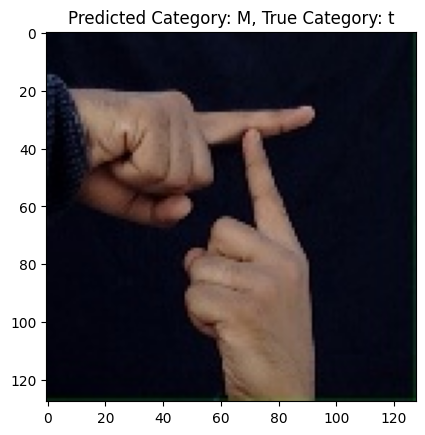

In [47]:
from tensorflow.keras.preprocessing import image
from keras.utils import load_img
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as img

d = {0: '1', 1: '2', 2: '3', 3: '4', 4: '5', 5: '6', 6: '7', 7: '8', 8: '9', 9: 'A', 10: 'B', 11: 'C', 12: 'D', 13: 'E', 14: 'F', 15: 'G', 16: 'H', 17: 'I', 18: 'J', 19: 'K', 20: 'L', 21: 'M', 22: 'N', 23: 'O', 24: 'P', 25: 'Q', 26: 'R', 27: 'S', 28: 'T', 29: 'U', 30: 'V', 31: 'W', 32: 'X', 33: 'Y', 34: 'Z'}
image_path = '/kaggle/working/val/T/814.jpg'
classifier = load_model('/kaggle/working/sign classifcation.h5')

# Load and preprocess the image
test_image = load_img(image_path, target_size=(64, 64, 3))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

# Make a prediction
result = classifier.predict(test_image)

# Get the true label (replace 'true_label' with the actual true label)
true_label = 't'

# Display the image
testImage = img.imread(image_path)
plt.imshow(testImage)
plt.title(f"Predicted Category: {d[np.argmax(result)]}, True Category: {true_label}")
plt.show()


1/1 [==============================] - 0s 75ms/step


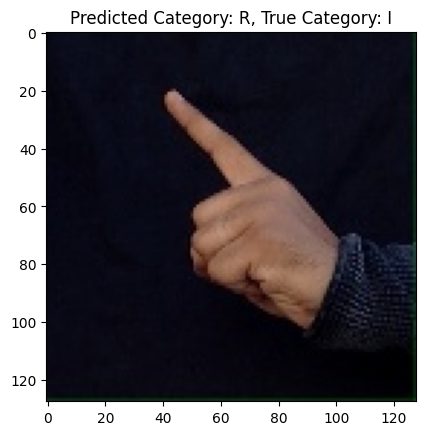

In [45]:
from tensorflow.keras.preprocessing import image
from keras.utils import load_img
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as img

d = {0: '1', 1: '2', 2: '3', 3: '4', 4: '5', 5: '6', 6: '7', 7: '8', 8: '9', 9: 'A', 10: 'B', 11: 'C', 12: 'D', 13: 'E', 14: 'F', 15: 'G', 16: 'H', 17: 'I', 18: 'J', 19: 'K', 20: 'L', 21: 'M', 22: 'N', 23: 'O', 24: 'P', 25: 'Q', 26: 'R', 27: 'S', 28: 'T', 29: 'U', 30: 'V', 31: 'W', 32: 'X', 33: 'Y', 34: 'Z'}
image_path = '/kaggle/working/val/I/765.jpg'
classifier = load_model('/kaggle/working/sign classifcation.h5')

# Load and preprocess the image
test_image = load_img(image_path, target_size=(64, 64, 3))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

# Make a prediction
result = classifier.predict(test_image)

# Get the true label (replace 'true_label' with the actual true label)
true_label = 'I'

# Display the image
testImage = img.imread(image_path)
plt.imshow(testImage)
plt.title(f"Predicted Category: {d[np.argmax(result)]}, True Category: {true_label}")
plt.show()
